In [20]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
n = 10

x = pd.read_csv('Project4.csv')
data = x.values[:,1:3]
df = pd.DataFrame(data, columns = ['Percent_Hardwood', 'Strength'])
print(df.head())
print('\n')

# Do the simple linear regression
model = ols('Strength ~ Percent_Hardwood', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
model.summary()




   Percent_Hardwood  Strength
0                10       160
1                15       171
2                15       175
3                20       182
4                20       184


参数估计值: 
 Intercept           143.8244
Percent_Hardwood      1.8786
dtype: float64


D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     260.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.20e-07
Time:                        15:21:22   Log-Likelihood:                -20.973
No. Observations:                  10   AIC:                             45.95
Df Residuals:                       8   BIC:                             46.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          143.8244      2.522     57.039      0.000     138.010     149.639
Percent_Hardwood     1.8786      0.117     16.125      0.000       1.610       2.147
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.701
Skew:                           0.157   Prob(JB):                        0.704
Kurtosis:                       1.742   Cond. No.                         78.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Percent_Hardwood = 143.8244 + 1.8786 * Strength


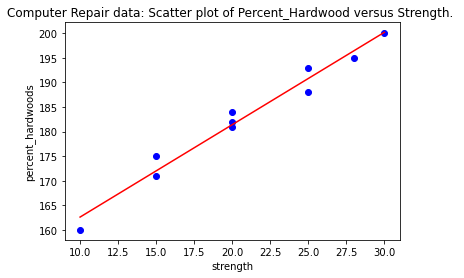

In [21]:
# 输出一元线性回归方程
print('Percent_Hardwood =', round(beta[0], 4), '+', round(beta[1], 4), '* Strength')

# 画图
x = data[:, 0]
y = data[:, 1]
Y = model.fittedvalues   # 预测值
plt.scatter(x, y, c = 'blue', label='Percent_Hardwood') # 原始数据
plt.plot(x, Y, 'red', label='Fit_percent_hardwoods') # 拟合数据
plt.title('Computer Repair data: Scatter plot of Percent_Hardwood versus Strength. ')
plt.xlabel('strength')
plt.ylabel('percent_hardwoods')
plt.show()

In [28]:
# 求解相关项
print(data[0])
x_mean = np.mean(data[:, 0])  # 自变量 x 的均值
y_mean = np.mean(data[:, 1])  # 因变量 y 的均值
sigma2 = sum((y - beta[0] - beta[1] * x) ** 2) / (n - 2)  # 方差
sigma = np.sqrt(sigma2)  # 标准差
lxx = sum((x - np.mean(x)) ** 2)  # 求l_xx
lyy = sum((y - np.mean(y)) ** 2)  # 求l_yy
lxy = sum((x - np.mean(x)) * (y - np.mean(y)))  # 求l_xy

[ 10 160]


In [29]:
# F检验
anova_results = round(anova_lm(model), 2)
print('The ANOVA table: \n', anova_results)

# 法1：
pVal1 = anova_results['PR(>F)'][0]
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：
F0 = anova_results['F'][0]
F = round(f.ppf(0.95, dfn = 1,dfd = n - 2), 2)
if F0 > F:
    print('Since F0 > F(0.95, 1, n - 2) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

The ANOVA table: 
                    df   sum_sq  mean_sq      F  PR(>F)
Percent_Hardwood  1.0  1262.07  1262.07  260.0     0.0
Residual          8.0    38.83     4.85    NaN     NaN

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 1, n - 2) =  5.32 , reject H0.


In [30]:
# t检验
t0 = beta[1] * np.sqrt(lxx) / sigma  # 求t值
print('t0值为：', round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - 2)  # 分位点函数（CDF的逆）
print('t的临界值为：', round(tVal, 4))
pVal2 = t.sf(t0, n - 2)  # 用残存函数（1-CDF）求p值 
# pVal2 = 1 - t.cdf(t0, n - 2)
print('P值为：', round(pVal2, 4))

# 法1：
if pVal2 < alpha:
    print ('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.')
    
# 法2：
if abs(t0) > tVal:
    print('Since t0 > t(0.975,12) = ', round(tVal, 4), ', reject H0.')
else:
    print('Accept H0.') 

t0值为： 16.1245
t的临界值为： 2.306
P值为： 0.0

Since p-value < 0.05, reject H0.
Since t0 > t(0.975,12) =  2.306 , reject H0.


In [31]:
# 相关系数检验
# 法1：代公式求得
r1 = lxy / np.sqrt(lxx * lyy)
print('法 1 求得的相关系数：', round(r1, 4))

# 法2：用pandas中DataFrame对象corr()方法
r2 = df.corr()
print('法 2 求得的相关系数：\n', round(r2, 4))

rVal = np.sqrt(F / (F + (n - 2)))
if abs(r1) > rVal:
    print ('\nSince r > r(0.975, n - 2) = ', round(rVal, 4), ', reject H0.')
else:
    print('\nAccept H0.')

法 1 求得的相关系数： 0.985
法 2 求得的相关系数：
                   Percent_Hardwood  Strength
Percent_Hardwood             1.000     0.985
Strength                     0.985     1.000

Since r > r(0.975, n - 2) =  0.632 , reject H0.


In [35]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta0 = tVal * sigma * np.sqrt(1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = input()
print('给定 x = %d, E(y_0) 的置信区间：'%int(x0), np.round(confidence_interval(x0), 4))

3
给定 x = 3, E(y_0) 的置信区间： [144.4153 154.5052]


In [34]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta1 = tVal * sigma * np.sqrt(1 + 1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

x00 = input()
print('给定 x = %d, y_0 的预测区间：'%int(x00), np.round(confidence_interval(x0), 4))

18
给定 x = 18, y_0 的预测区间： [172.2584 183.0212]
